<a href="https://colab.research.google.com/github/Rahulkrishna07/object-image-classification-/blob/main/Copy_of_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

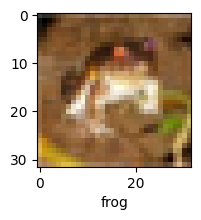

In [ ]:
plot_sample(X_train, y_train, 0)

In [ ]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 96ms/step - accuracy: 0.3031 - loss: 1.9330
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 99ms/step - accuracy: 0.4199 - loss: 1.6428
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 103ms/step - accuracy: 0.4539 - loss: 1.5490
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 159s 101ms/step - accuracy: 0.4777 - loss: 1.4807
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 194s 97ms/step - accuracy: 0.4942 - loss: 1.4361


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.48      0.54      1000
           1       0.58      0.61      0.59      1000
           2       0.32      0.44      0.37      1000
           3       0.27      0.56      0.36      1000
           4       0.72      0.10      0.18      1000
           5       0.39      0.34      0.36      1000
           6       0.55      0.49      0.52      1000
           7       0.66      0.42      0.51      1000
           8       0.66      0.57      0.61      1000
           9       0.47      0.65      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



In [ ]:
## now lets build cnn model for our image classsification

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 45ms/step - accuracy: 0.3740 - loss: 1.7213
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 42ms/step - accuracy: 0.5691 - loss: 1.2169
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6367 - loss: 1.0343
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6774 - loss: 0.9343
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7005 - loss: 0.8580
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.7195 - loss: 0.8039
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.7368 - loss: 0.7618
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.7551 - loss: 0.7132
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.7651 - loss: 0.6691
Epoch 10/10


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6992 - loss: 0.9261


[0.932839035987854, 0.698199987411499]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


array([[4.58079216e-04, 2.59401368e-05, 1.53635652e-03, 8.67952108e-01,
        6.18248340e-03, 1.42796347e-02, 4.76103798e-02, 1.17808394e-03,
        6.06470630e-02, 1.29771710e-04],
       [2.43436079e-02, 2.83256583e-02, 6.07799848e-06, 3.76361186e-07,
        1.67857806e-07, 7.73825093e-09, 1.12164400e-07, 4.54370674e-09,
        9.46423054e-01, 9.00921412e-04],
       [4.98205535e-02, 9.17100430e-01, 1.03025275e-04, 3.52388743e-04,
        3.54568438e-05, 1.20166214e-05, 1.37879548e-03, 4.37964336e-04,
        2.41957773e-02, 6.56354055e-03],
       [9.88991976e-01, 2.11767474e-04, 5.32712974e-03, 2.29087818e-05,
        1.02897451e-04, 1.19985589e-06, 4.47830789e-05, 1.49102125e-05,
        5.27522713e-03, 7.11455687e-06],
       [2.29542851e-09, 1.11556983e-06, 3.98286106e-03, 8.30654707e-03,
        5.85691214e-01, 6.62897583e-05, 4.01925713e-01, 1.15737414e-07,
        2.61375826e-05, 9.73994929e-09]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[3]]